In [1]:
import tqdm.auto

import pandas as pd
import numpy as np
import pickle
import shap
shap.initjs()

import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.model_selection import train_test_split
from functions import df_engineered

pd.set_option('display.max_columns', None)

In [2]:
feature_selection = ['ExterQual', 'BsmtQual', 'KitchenQual', 'OverallQual', 
                    'GrLivArea', 'TotalBsmtSF', 'GarageArea', 'FullBath', 
                    'HouseAge', 'TotRmsAbvGrd', 'OverallCond',  'FlrSF1st', 'FlrSF2nd',
                    'Fireplaces', 'HasFireplace','LotFrontage', 'LotArea', 'MSSubClass', 'GoodGarageType', 
                    'BsmtUnfSF', 'Zone', 'Location', 'CulDSac', 'ExQual', 'RemodAge', 'LargerHouse', 
                    'Remod', 'ExBsmtQual', 'TwoStory', 'TotalSF', 'RoadRail', 'ExKitchen', 'CentralAir',
                    'TotalBath', 'Exterior1st_top']
                        

In [3]:
df = pd.read_csv('data/Ames_Housing_Price_Data.csv', index_col=0).iloc[:,1:]
print('df shape:', df.shape)

data = df_engineered(df, Reg=False)

df shape: (2580, 80)


In [4]:
X_train, X_test, y_train, y_test = train_test_split(data[feature_selection], data['SalePrice'], test_size=0.30, random_state=42)

# SHAP

In [5]:
# Get best model (XGBoost)
file_name='xgb_reg_20230719-13.12.55.pkl'
xgb_model = pickle.load(open(file_name, "rb"))

In [6]:
explainer = shap.TreeExplainer(xgb_model.best_estimator_)
shap_interaction = explainer.shap_interaction_values(X_train)

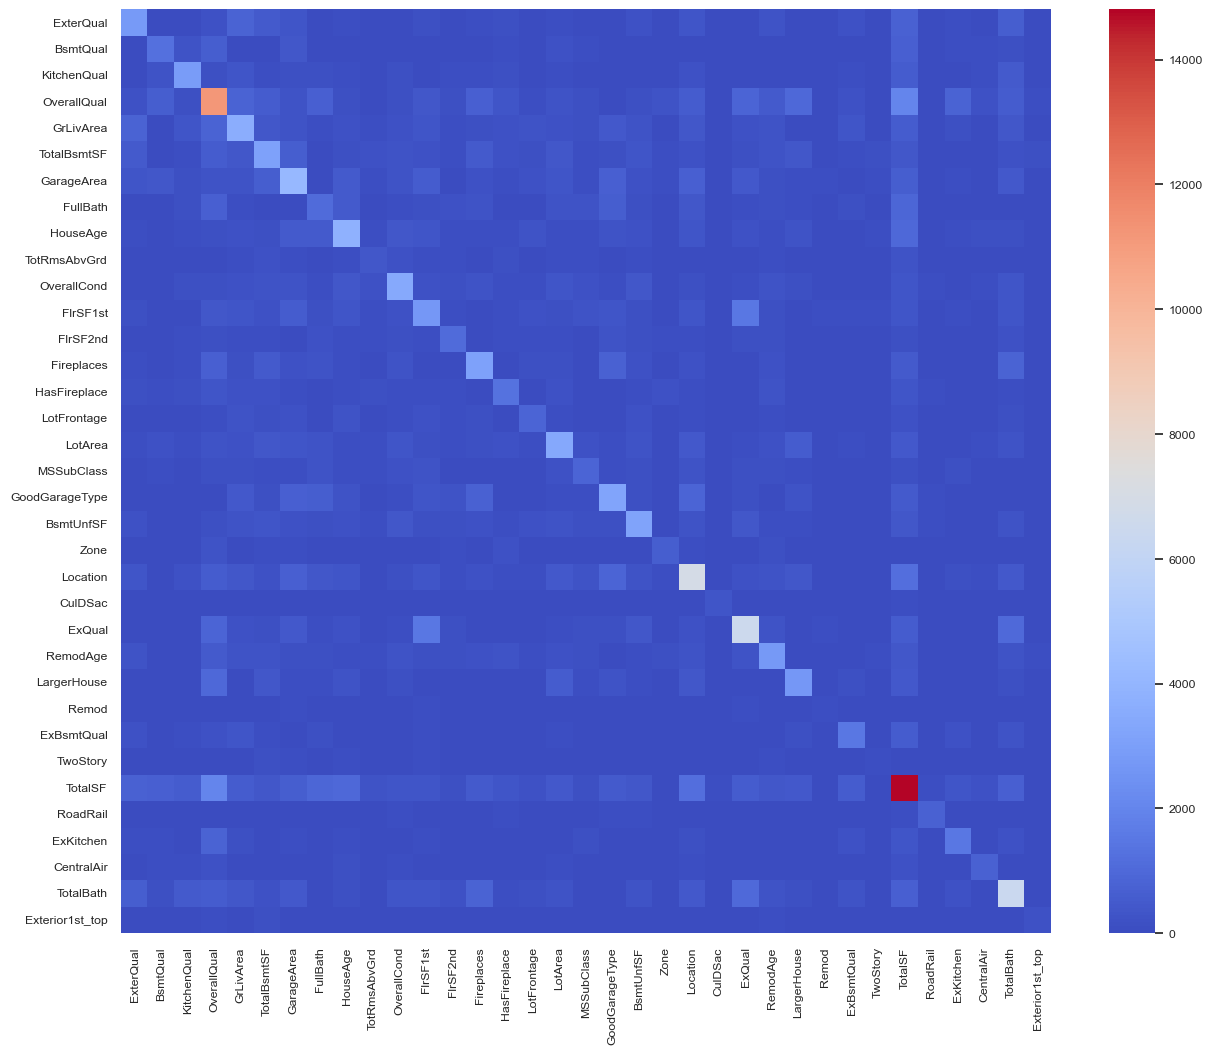

In [7]:
# The diagonal shows the absolute mean effects and the rest shows the interaction effects. 

mean_shap = np.round(np.abs(shap_interaction).mean(0),1)
df = pd.DataFrame(mean_shap,index=X_train.columns,columns=X_train.columns)

# times off diagonal by 2
df.where(df.values == np.diagonal(df),df.values*2,inplace=True)

# display 
plt.figure(figsize=(15, 12), facecolor='w', edgecolor='k')
sns.set(font_scale=0.8)
sns.heatmap(df,cmap='coolwarm',annot=False,fmt='.3g',cbar=True)
plt.yticks(rotation=0) 
plt.show()

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


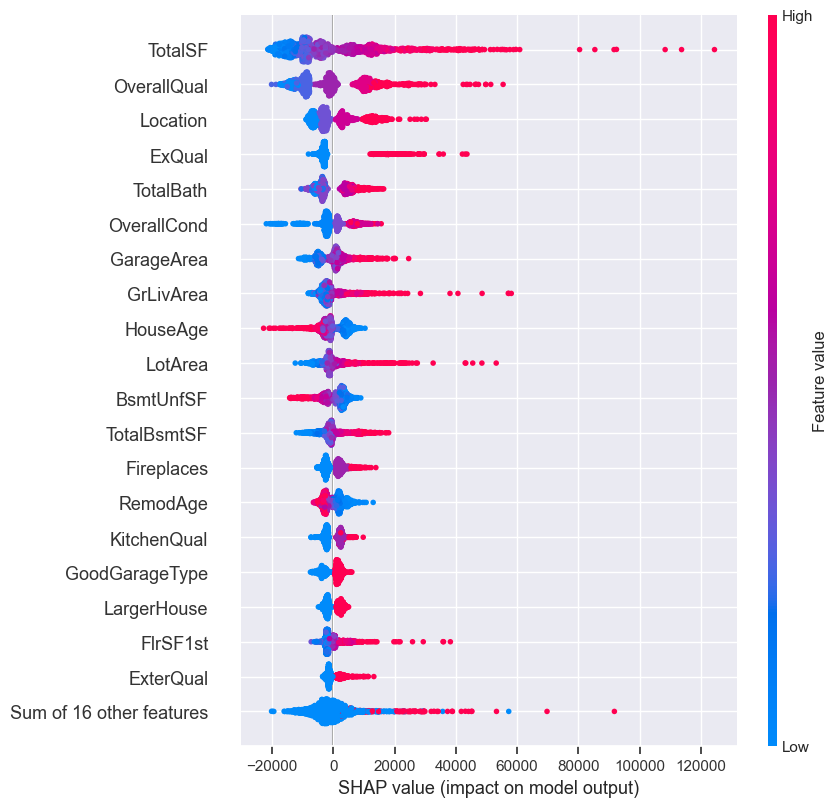

In [8]:
# This are the TOTAL shap values, different from the MAIN EFFECTS

# Get SHAP values
shap_values = explainer(X_train)

#Display beeswarm plot
shap.plots.beeswarm(shap_values, max_display=20)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
The figure layout has changed to tight
The figure layout has changed to tight


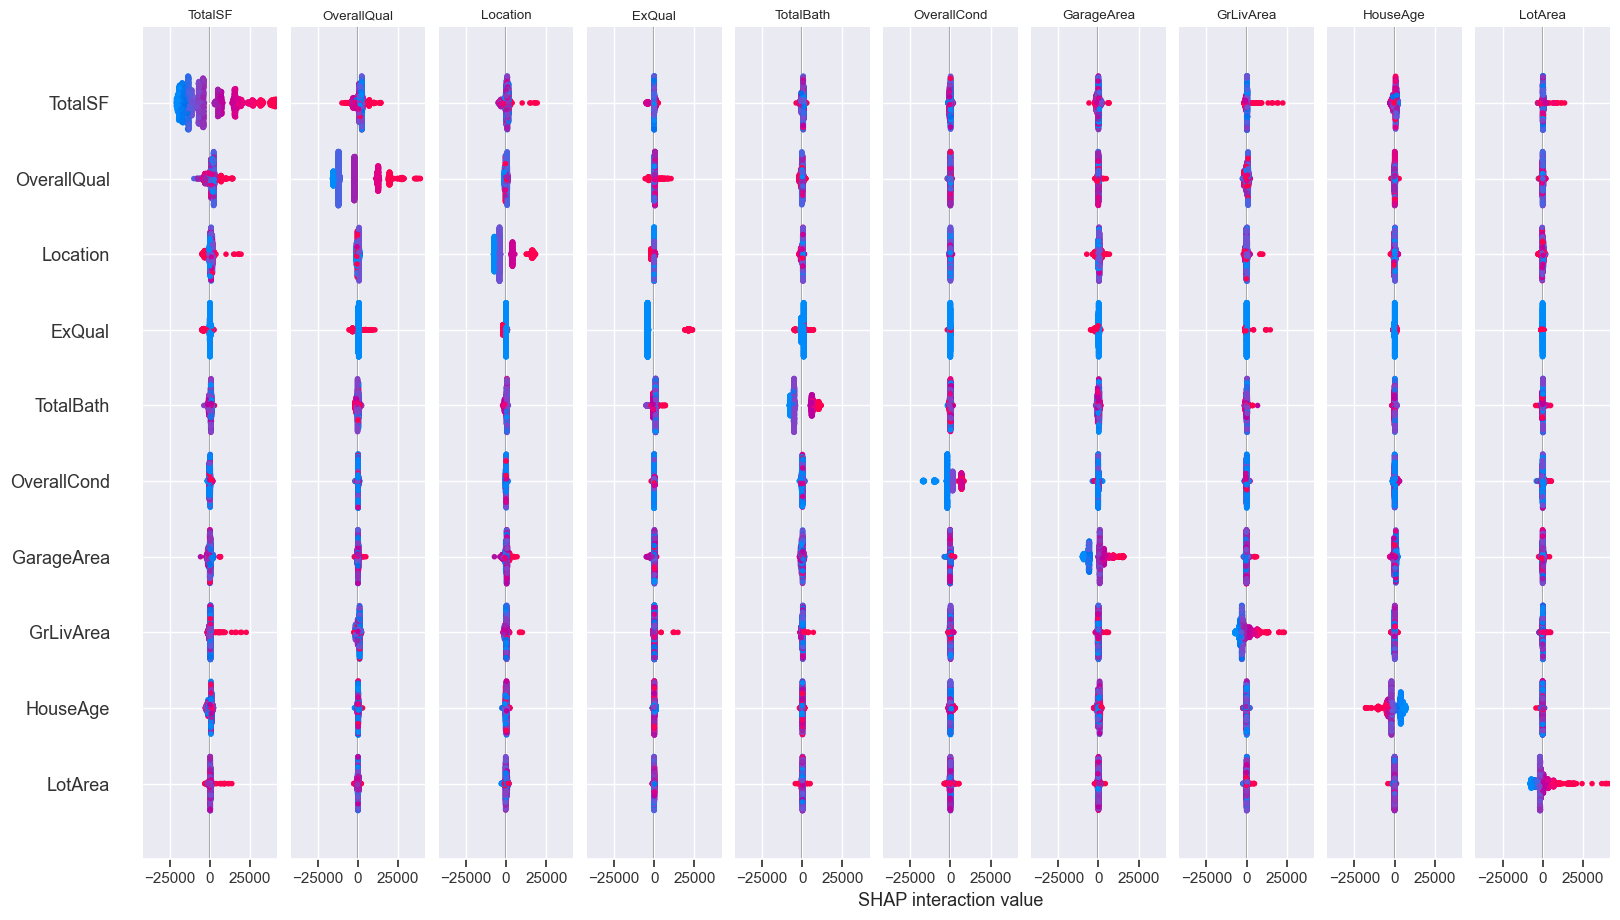

In [9]:
# Display summary plot, this shows the main and interaction effects.

shap.summary_plot(shap_interaction, X_train, max_display=10)

# Interactions

### Garage area and Garage Type

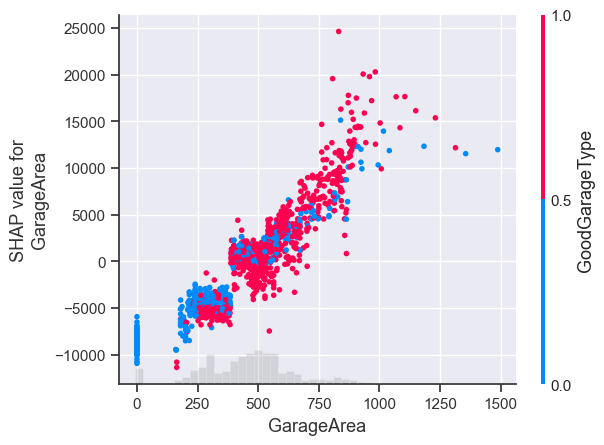

In [10]:
# Total effect garage area

fig, ax = plt.subplots()
shap.plots.scatter(shap_values[:, "GarageArea"], color=shap_values[:,"GoodGarageType"], ax=ax)

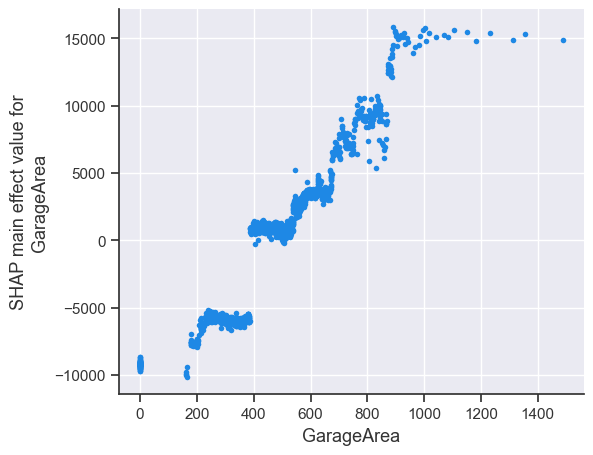

In [11]:
# Main effect garage area

shap.dependence_plot(
    ("GarageArea", "GarageArea"),
    shap_interaction, X_train,
    display_features=X_train,show=False)

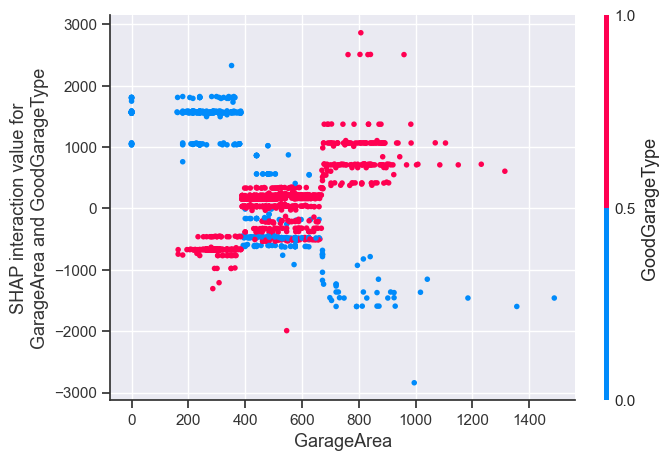

In [12]:
# Interaction effect garage area and garage type

shap.dependence_plot(
    ("GarageArea", "GoodGarageType"),
    shap_interaction, X_train,
    display_features=X_train,show=False)

### FlrSF1st and ExQual

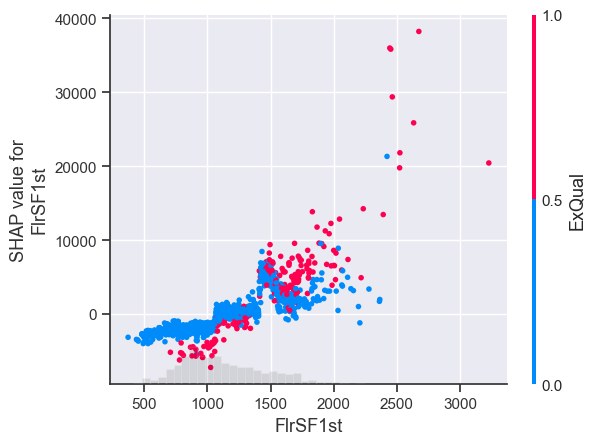

In [13]:
# Total effect FlrSF1st

fig, ax = plt.subplots()
shap.plots.scatter(shap_values[:, "FlrSF1st"], color=shap_values[:,"ExQual"], ax=ax)

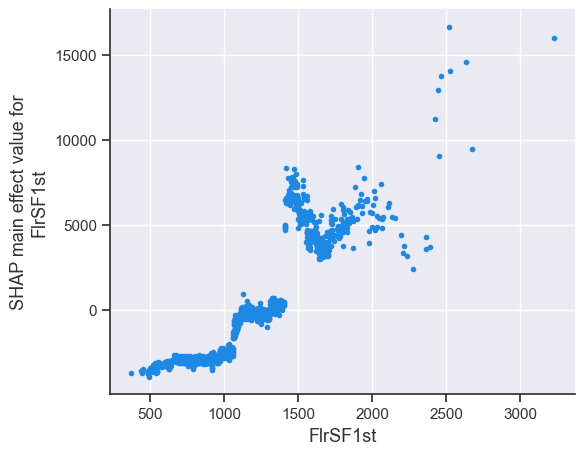

In [14]:
# Main effect FlrSF1st

shap.dependence_plot(
    ("FlrSF1st", "FlrSF1st"),
    shap_interaction, X_train,
    display_features=X_train,show=False)

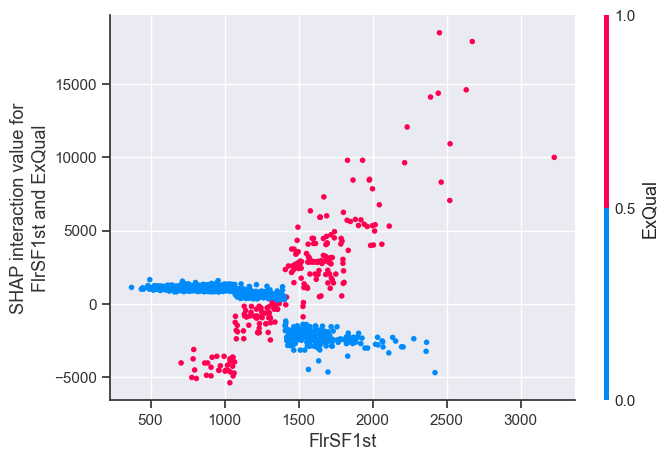

In [15]:
# Interaction effect FlrSF1st and ExQual

shap.dependence_plot(
    ("FlrSF1st", "ExQual"),
    shap_interaction, X_train,
    display_features=X_train,show=False)

### TotalSF and Location

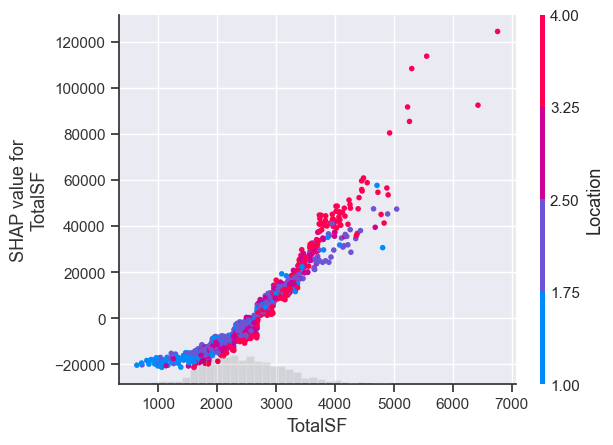

In [16]:
# Total effect TotalSF

fig, ax = plt.subplots()
shap.plots.scatter(shap_values[:, "TotalSF"], color=shap_values[:,"Location"], ax=ax)

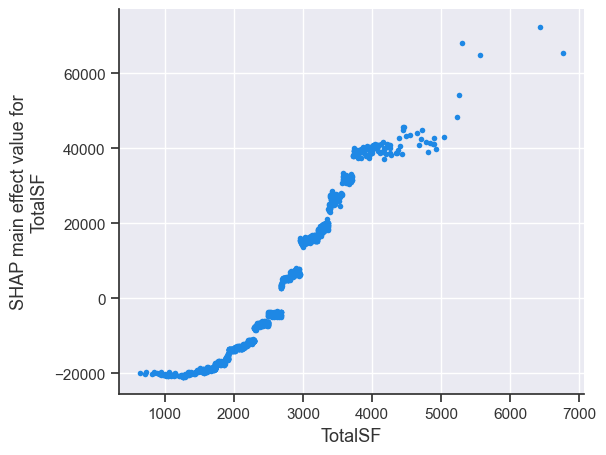

In [17]:
# Main effect TotalSF

shap.dependence_plot(
    ("TotalSF", "TotalSF"),
    shap_interaction, X_train,
    display_features=X_train,show=False)

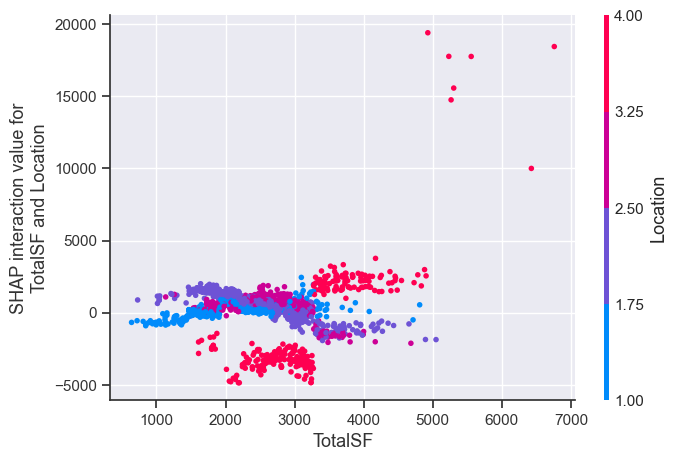

In [18]:
# Interaction effect TotalSF and Location

shap.dependence_plot(
    ("TotalSF", "Location"),
    shap_interaction, X_train,
    display_features=X_train,show=False)

### GrLivArea and HasFireplace

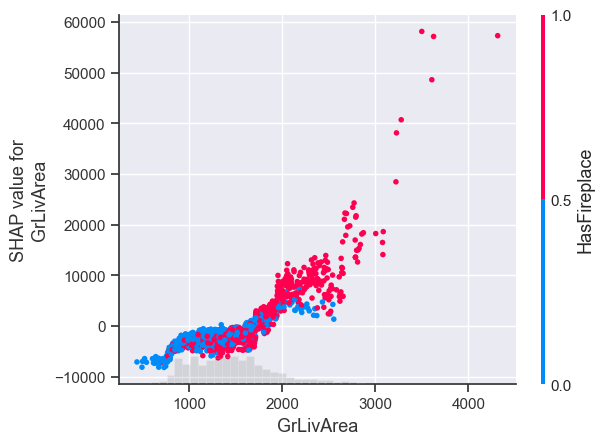

In [19]:
# Total effect GrLivArea

fig, ax = plt.subplots()
shap.plots.scatter(shap_values[:, "GrLivArea"], color=shap_values[:,"HasFireplace"], ax=ax)

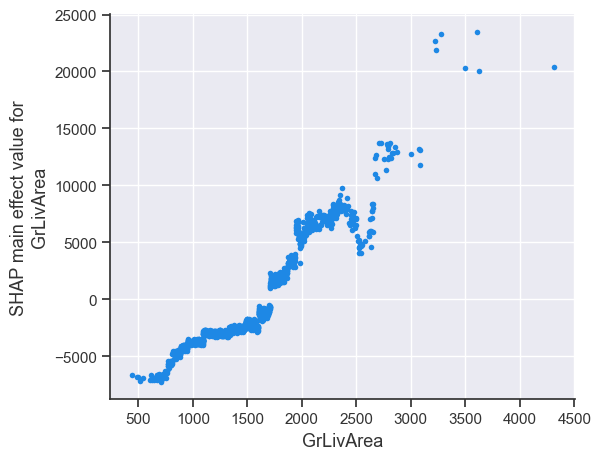

In [20]:
# Main effect GrLivArea

shap.dependence_plot(
    ("GrLivArea", "GrLivArea"),
    shap_interaction, X_train,
    display_features=X_train,show=False)

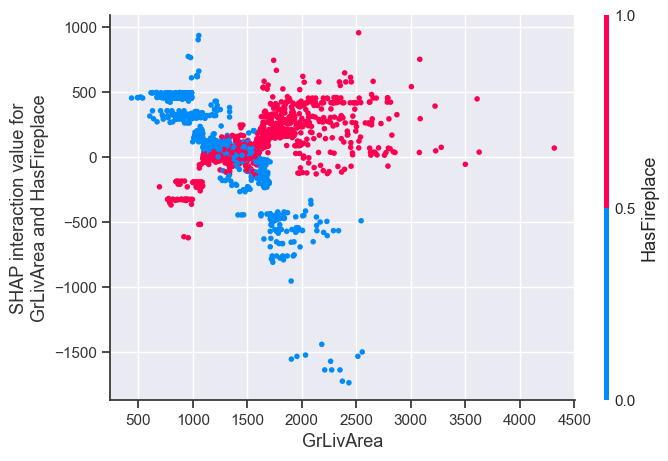

In [21]:
# Interaction effect GrLivArea and HasFireplace

shap.dependence_plot(
    ("GrLivArea", "HasFireplace"),
    shap_interaction, X_train,
    display_features=X_train,show=False)